<a href="https://colab.research.google.com/github/TejashreeKarekar/DS_Projects/blob/main/blackFriday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
# statistical info
df.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,3.613910e+05,361391.000000,361391.000000,361391.000000,249424.000000,110750.000000,361391.000000
mean,1.002964e+06,8.073488,0.410486,5.294000,9.844510,12.653129,9325.319510
std,1.742907e+03,6.529109,0.491923,3.746152,5.087924,4.129073,4976.986649
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001415e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.002994e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8060.000000
75%,1.004438e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12066.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [7]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361391 entries, 0 to 361390
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     361391 non-null  int64  
 1   Product_ID                  361391 non-null  object 
 2   Gender                      361391 non-null  object 
 3   Age                         361391 non-null  object 
 4   Occupation                  361391 non-null  int64  
 5   City_Category               361391 non-null  object 
 6   Stay_In_Current_City_Years  361391 non-null  object 
 7   Marital_Status              361391 non-null  int64  
 8   Product_Category_1          361391 non-null  int64  
 9   Product_Category_2          249424 non-null  float64
 10  Product_Category_3          110750 non-null  float64
 11  Purchase                    361391 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 33.1+ MB


In [8]:
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3554
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      17173
dtype: int64

<Axes: xlabel='Purchase', ylabel='Density'>

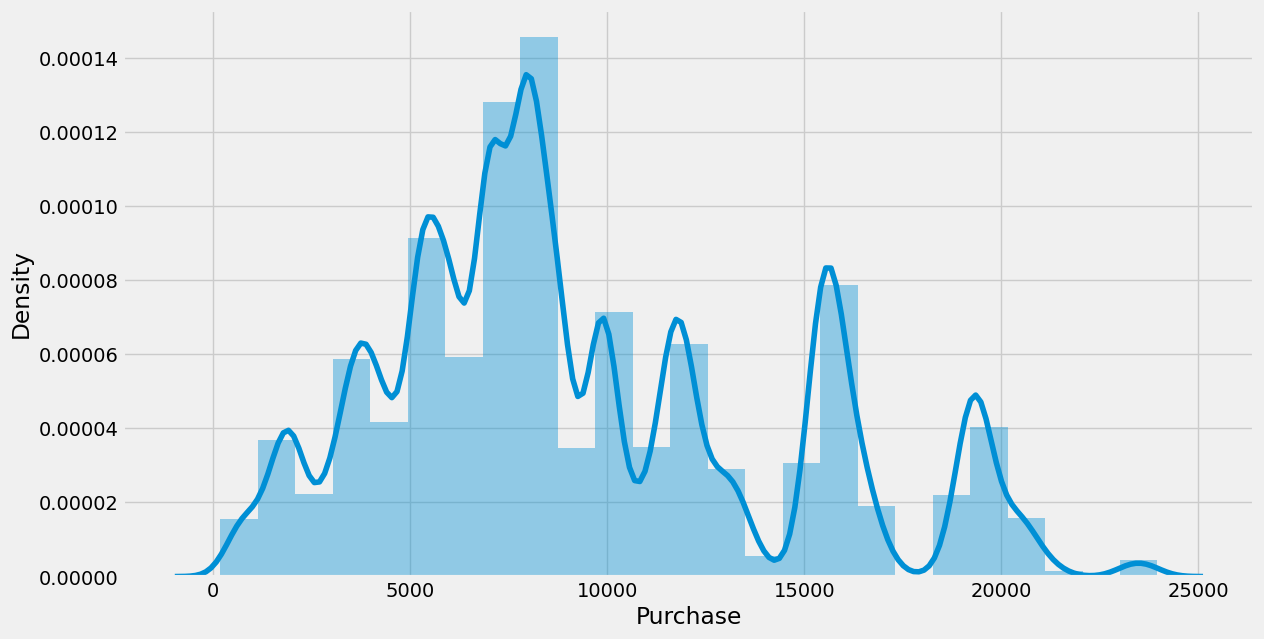

In [9]:
# distplot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['Purchase'], bins=25)

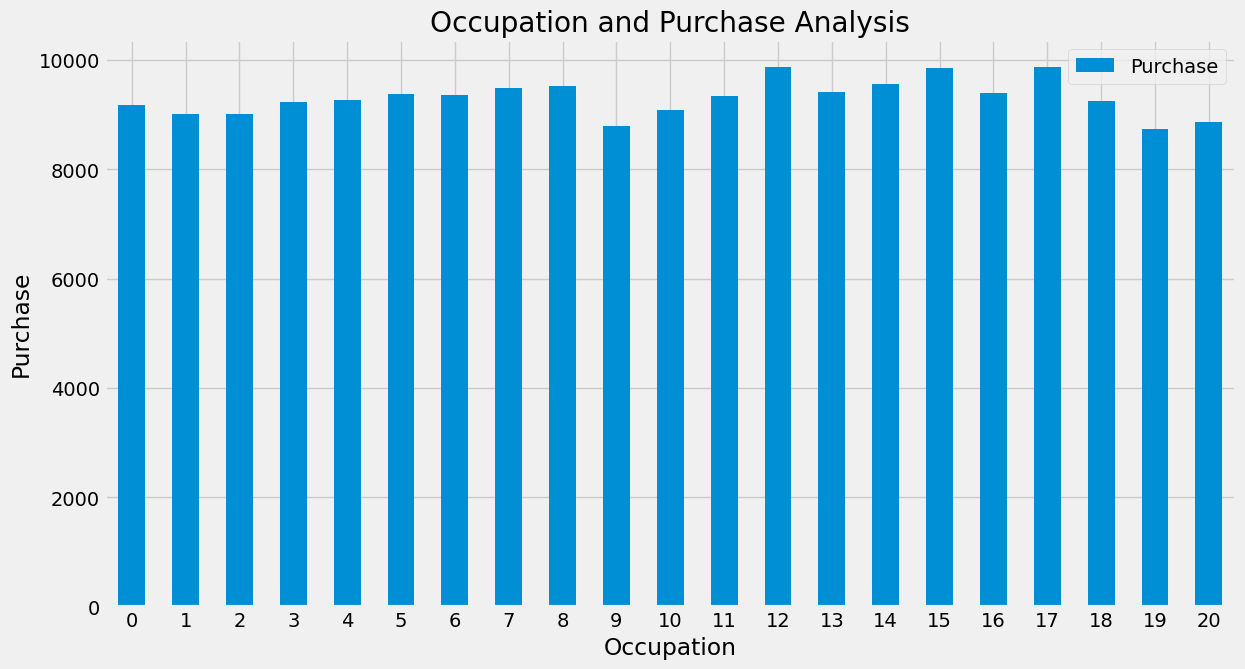

In [10]:

occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

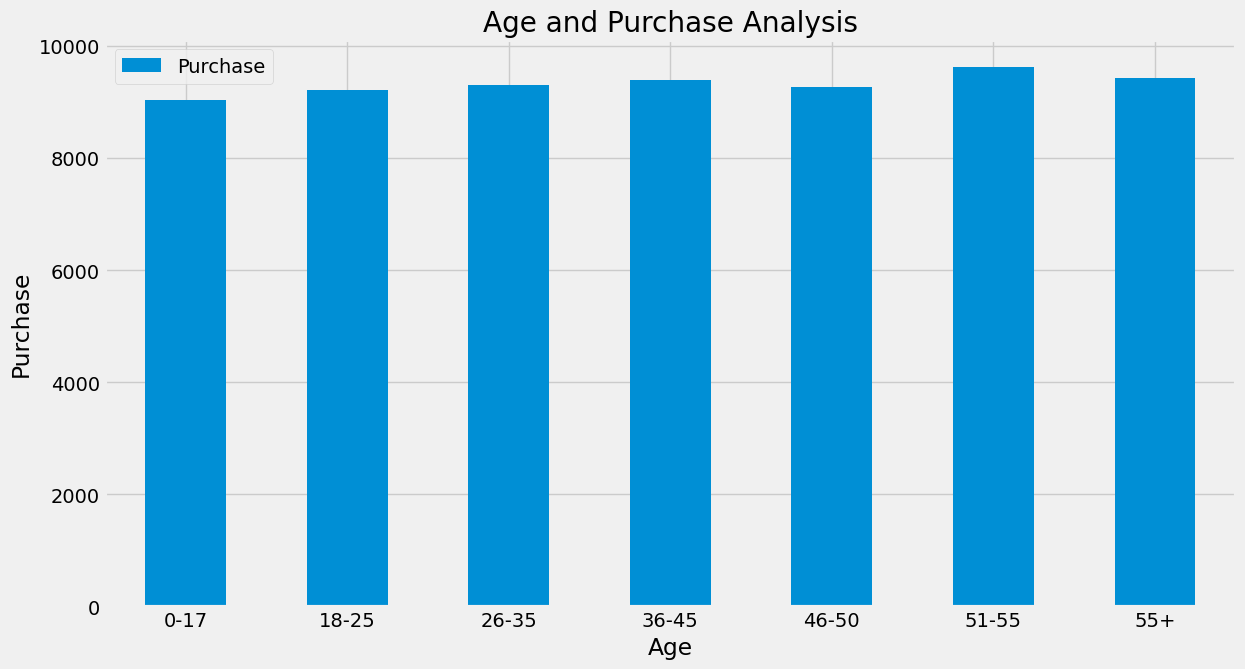

In [11]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

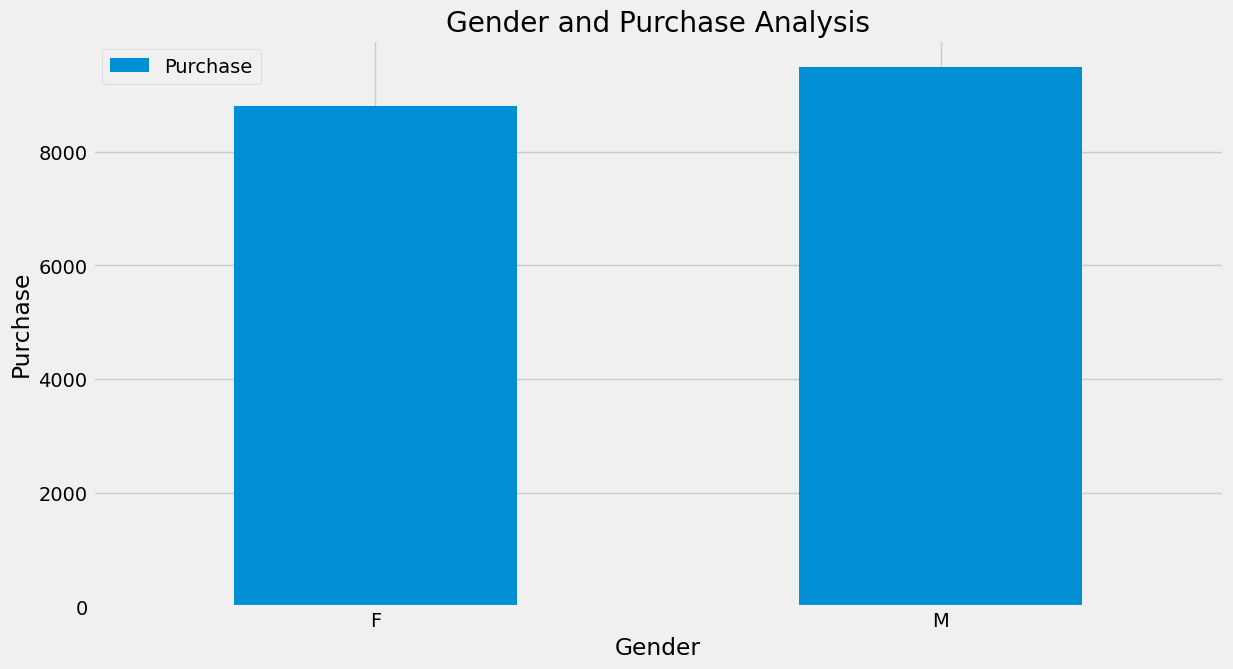

In [12]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [13]:
df.isnull().sum()
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [14]:
gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [15]:
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


In [16]:
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']


In [17]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)

    # predict the results
    pred = model.predict(x_test)

    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))


Results
MSE: 4621.205235665813
CV Score: 4625.655373769916


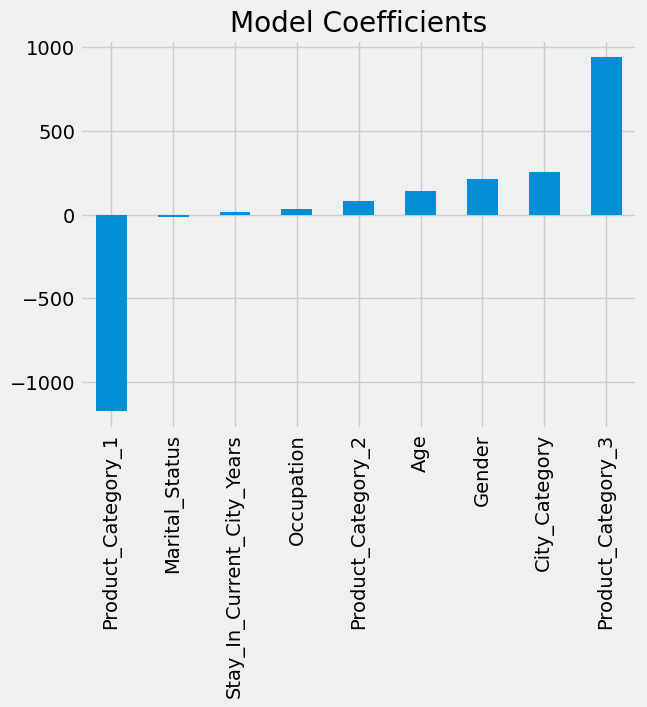

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

def train(model, X, y):
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)

    # predict the results
    pred = model.predict(x_test)

    # cross validation
    cv_score = cross_val_score(model, X_scaled, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

# Assuming X and y are defined
model = LinearRegression()
train(model, X, y)

# Plotting the coefficients
coef = pd.Series(model.coef_, index=X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
plt.show()


Results
MSE: 3459.1303163999605
CV Score: 3451.8999475870983


<Axes: title={'center': 'Feature Importance'}>

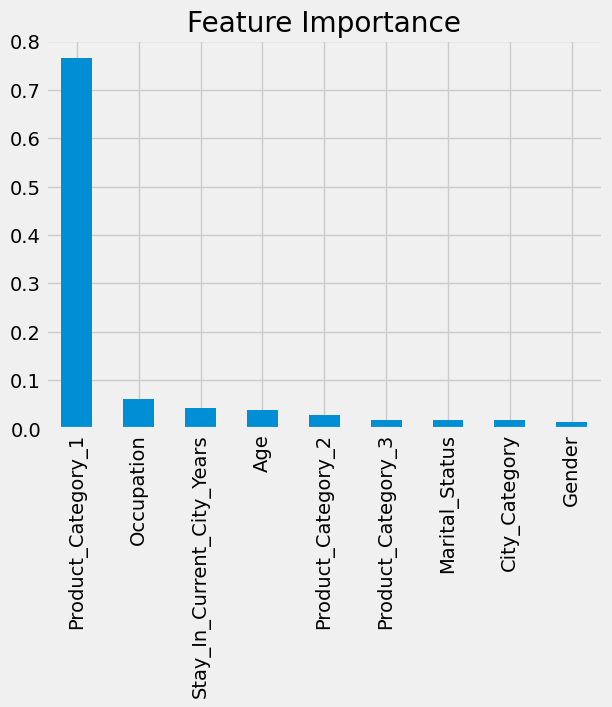

In [24]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')
